In [13]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import glob

In [27]:
# データの取得
data_path = glob.glob("../../data/house*/train.csv")[0]
data = pd.read_csv(data_path)
data = data[['GrLivArea','GarageArea','PoolArea','BedroomAbvGr','TotRmsAbvGrd']]
data.head()

,GrLivArea,GarageArea,PoolArea,BedroomAbvGr,TotRmsAbvGrd
0,1710,548,0,3,8
1,1262,460,0,3,6
2,1786,608,0,3,6
3,1717,642,0,3,7
4,2198,836,0,4,9


In [28]:
## 行列の標準化
std_sc = StandardScaler()
std_sc.fit(data)
std_data = std_sc.transform(data)
std_data_df = pd.DataFrame(std_data, columns = data.columns)
## PCAの実行（2次元に次元削減）
pca = PCA()
pca.fit(std_data_df)
pca_cor = pca.transform(std_data_df)
cor = pd.DataFrame(pca_cor[:,:2], columns=["PC{}".format(x + 1) for x in range(2)])
cor.head()

,PC1,PC2
0,0.922232,-0.105274
1,-0.414100,-0.116036
2,0.380777,0.217096
3,0.714253,0.172213
4,2.813992,-0.067176


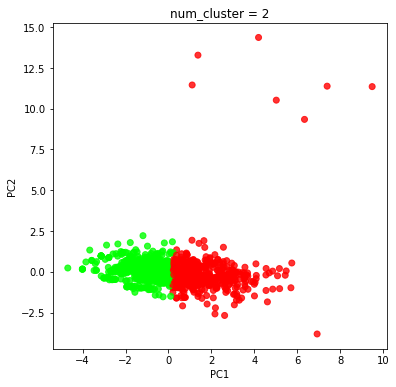

In [29]:
pred = KMeans(n_clusters=2).fit_predict(cor)
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}
colors = [color_codes[x] for x in pred]
plt.figure(figsize=(6, 6))
plt.title("num_cluster = 2")
plt.scatter(cor["PC1"], cor["PC2"], alpha=0.8, color=colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

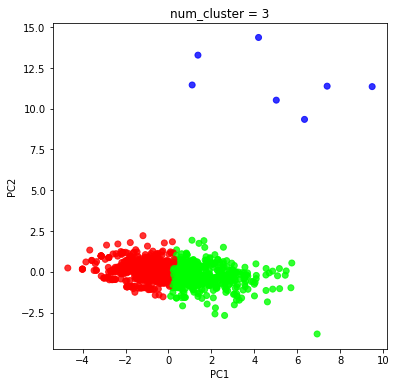

In [30]:
pred = KMeans(n_clusters=3).fit_predict(cor)
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF'}
colors = [color_codes[x] for x in pred]
plt.figure(figsize=(6, 6))
plt.title("num_cluster = 3")
plt.scatter(cor["PC1"], cor["PC2"], alpha=0.8, color=colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()